<a href="https://colab.research.google.com/github/MinyoungHer/Pytorch-study/blob/main/02_Pytorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with Pytorch

Classification is a problem of predicting whether something is one thing or another
 (there can be multiple things as the options).

## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples=1000

#Create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)



In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"first 5 samples of X: {X[:5]}")
print(f"first 5 samples of y: {y[:5]}")

first 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles= pd.DataFrame({"X1": X[:,0],
                       "X2": X[:,1],
                       "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


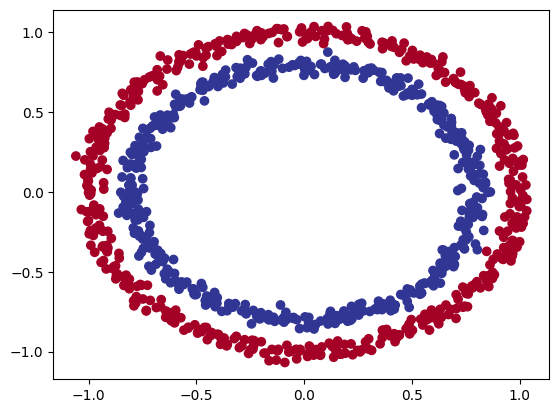

In [ ]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of features and labels
X_sample=X[0]
y_sample=y[0]

print(f"values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X : {X_sample.shape} and the same for y :{y_sample.shape}")

values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X : (2,) and the same for y :()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
# Turn data into tensors
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42) #random seed)



In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run an accelerator if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and testing loop

In [ ]:
# Import Pytroch and nn
import torch
from torch import nn

device= 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train


tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

 1. Subclasses `nn.Module` (almost all models in Pytorch subclass `nn.Module`)
 2. Create 2 `nn.Linear()` layers that are capable of gandling the shapes of our data
 3. Defines a `forward()` method that outlines the forward pass(or forward computation) of the model
 4. Instantiate an instance of our model class and send it to the target device

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data\
    self.layer_1=nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2=nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(X))
# 4. Instantiate an instance of our model class and send it to the target device
model_0= CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3118,  0.2428],
                      [ 0.5077, -0.4794],
                      [-0.6631, -0.5611],
                      [-0.2302,  0.2660],
                      [ 0.2740, -0.0503]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4322, -0.0824,  0.4428, -0.4342,  0.3431], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3069,  0.3627, -0.0605,  0.1599, -0.3790]], device='cuda:0')),
             ('1.bias', tensor([-0.4201], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds= model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)}, shape:{untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"/nFirst 10 predictions: {untrained_preds[:10]}")
print(f"/nFirst 10 labels: {y_test[0:10]} ")

Length of predictions:200, shape:torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])
/nFirst 10 predictions: tensor([[-0.6434],
        [-0.6905],
        [-0.4870],
        [-0.6879],
        [-0.4348],
        [-0.4639],
        [-0.6380],
        [-0.5848],
        [-0.4895],
        [-0.6931]], device='cuda:0')
/nFirst 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]) 


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

For example for regresiion you might want MAE or MSE (mean absolute error or mean squared error)

For classifivation you might want binary cross entropy or categorical cross entropy(cross entropy)

As a reminder, the loss function measures how wrong your model predictions are.

And for optimizers. two of the most common and useful are SGD and Adam. However, Pytorch has many built-in options.

* For the loss function, we're going to use `torch.nn.BECWithLogitsLOSS()`.

In [ ]:
# Setup the loss function
#loss_fn=nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn=nn.BCEWithLogitsLoss() # sigmoid function built-in

optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc


## 3. Train model

To train a model, we need a training loop

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)


### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.6434],
        [-0.6905],
        [-0.4870],
        [-0.6879],
        [-0.4348]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_preds_probs=torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.3445],
        [0.3339],
        [0.3806],
        [0.3345],
        [0.3930]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs`>=0.5, `y=1`, (class=1)
* `y_pred_probs`<0.5, `y=0` (class=0)

In [ ]:
# Find the predicted labels
y_preds=torch.round(y_preds_probs)

# In full(logits -> pred probs -> pred labels)
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs=100

# Put data to target device
X_train, y_train, = X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

#Building training and evaluation loop
for epoch in range(epochs):
  model_0.train()

  #1. Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2. calculate loss/accuracy
  #loss=loss_fn(torch.sigmoid(y_logits), ##nn.BCELoss expects prediction probabilities as input
  #             y_train)
  loss=loss_fn(y_logits,  ##nn.BCEWithLogitsLOSS expects raw logits as input
               y_train)

  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()

  ### testing
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

# Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss}, ACC: {acc} | Test loss: {test_loss}, Test acc: {test_acc}%")

Epoch: 0 | Loss: 0.7312536239624023, ACC: 50.0 | Test loss: 0.7252094149589539, Test acc: 50.0%
Epoch: 10 | Loss: 0.7093114852905273, ACC: 50.0 | Test loss: 0.7041166424751282, Test acc: 50.0%
Epoch: 20 | Loss: 0.7013342380523682, ACC: 50.0 | Test loss: 0.6962524056434631, Test acc: 50.0%
Epoch: 30 | Loss: 0.6981734037399292, ACC: 44.375 | Test loss: 0.6932066082954407, Test acc: 48.0%
Epoch: 40 | Loss: 0.6967170834541321, ACC: 46.25 | Test loss: 0.6919904351234436, Test acc: 50.5%
Epoch: 50 | Loss: 0.6959011554718018, ACC: 47.5 | Test loss: 0.6915121078491211, Test acc: 51.5%
Epoch: 60 | Loss: 0.6953567266464233, ACC: 47.375 | Test loss: 0.6913556456565857, Test acc: 50.5%
Epoch: 70 | Loss: 0.6949494481086731, ACC: 48.0 | Test loss: 0.6913518905639648, Test acc: 51.5%
Epoch: 80 | Loss: 0.6946259140968323, ACC: 48.0 | Test loss: 0.691426157951355, Test acc: 52.5%
Epoch: 90 | Loss: 0.6943615674972534, ACC: 48.0 | Test loss: 0.6915422081947327, Test acc: 51.0%


## 4. Make predictions and evaluate the model

From the metrics it looks like ourmodel isn't learning anything...

So to inspect it let's make some predictions and make them visual

To do so, we're going to import a function called `plot_decision_boudary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


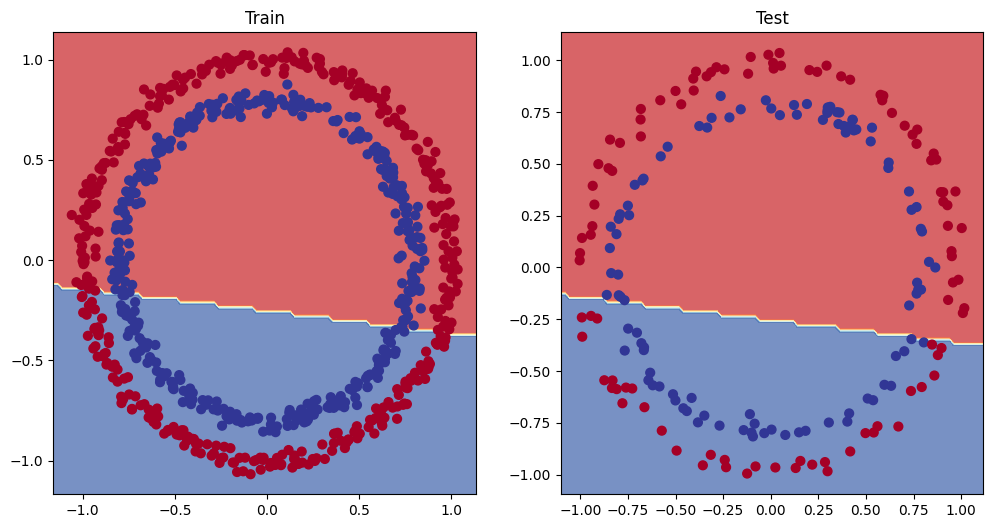

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as we machine learning engineers and data scientists) can change, they are referred as  **hyperparameters**

Let's try and improve our model by:

* Adding more hidden units: 5-> 10
* Increase the number of layers: 2->3
* Increase the number of epochs: 100 -> 1000

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
   # z=self.layer_1(x)
    #z=self.layer_2(z)
    #z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))
    # this way of writing operations leverages speed ups

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
from torch.nn.modules.loss import BCEWithLogitsLoss
#Create a loss function
loss_fn=BCEWithLogitsLoss()

#Create an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:
# Training and evaluation loop for model_1

torch.manual_seed(42)

epochs=1000

X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits, y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing

  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits, y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

    if epoch % 100 ==0 :
      print(f"epoch:{epoch} | Loss: {loss} | ACC: {acc} | Test loss: {test_loss} | test acc: {test_acc}%")


epoch:0 | Loss: 0.6939550638198853 | ACC: 50.875 | Test loss: 0.6926146745681763 | test acc: 51.0%
epoch:100 | Loss: 0.6930478811264038 | ACC: 50.375 | Test loss: 0.6937904357910156 | test acc: 48.0%
epoch:200 | Loss: 0.6929859519004822 | ACC: 51.125 | Test loss: 0.6943727135658264 | test acc: 46.0%
epoch:300 | Loss: 0.6929804682731628 | ACC: 51.625 | Test loss: 0.6945767998695374 | test acc: 45.0%
epoch:400 | Loss: 0.6929798722267151 | ACC: 51.125 | Test loss: 0.6946452260017395 | test acc: 46.0%
epoch:500 | Loss: 0.6929798722267151 | ACC: 51.0 | Test loss: 0.6946680545806885 | test acc: 46.0%
epoch:600 | Loss: 0.6929798722267151 | ACC: 51.0 | Test loss: 0.6946756839752197 | test acc: 46.0%
epoch:700 | Loss: 0.6929798722267151 | ACC: 51.0 | Test loss: 0.6946782469749451 | test acc: 46.0%
epoch:800 | Loss: 0.6929798722267151 | ACC: 51.0 | Test loss: 0.6946790814399719 | test acc: 46.0%
epoch:900 | Loss: 0.6929798722267151 | ACC: 51.0 | Test loss: 0.6946793794631958 | test acc: 46.0%


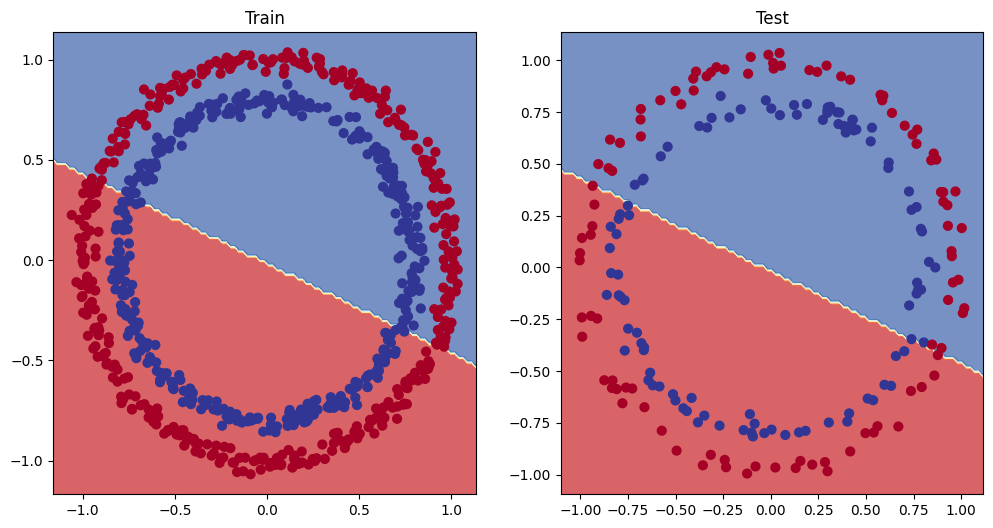

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [ ]:
from prompt_toolkit.shortcuts.progress_bar.base import E
# Create some data
weight=0.7
bias=0.3
start=0
end=1
step=0.01

#Create data
X_regression=torch.arange(start, end, step).unsqueeze(dim=1)
y_regression=weight*X_regression + bias

len(X_regression)
X_regression[:5], y_regression[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split=int(0.8*len(X_regression))
X_train_regression, y_train_regression=X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression=X_regression[train_split:], y_regression[train_split:]
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

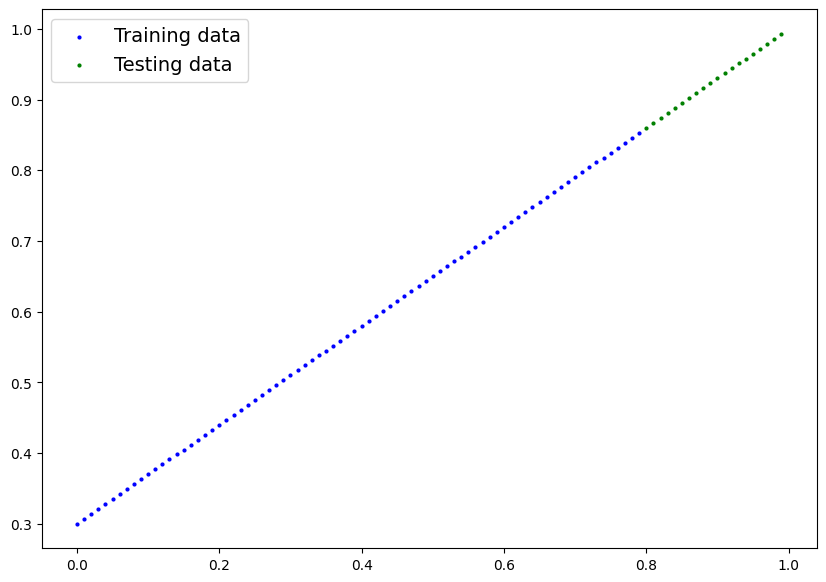

In [ ]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression,
                 test_data=X_test_regression, test_labels=y_test_regression)

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential())

model_2=nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
list(model_2.parameters())

[Parameter containing:
 tensor([[ 0.7645],
         [ 0.8300],
         [-0.2343],
         [ 0.9186],
         [-0.2191],
         [ 0.2018],
         [-0.4869],
         [ 0.5873],
         [ 0.8815],
         [-0.7336]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
         -0.4668,  0.2549], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
           0.0298, -0.3123],
         [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, 

In [ ]:
# Loss and optimizer
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [ ]:
# Training loop
torch.manual_seed(42)
epochs=1000

X_train_regression, y_train_regression=X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression=X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  y_pred=model_2(X_train_regression)
  loss=loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

epoch: 0 | loss: 0.7598585486412048 | test loss: 0.9110288619995117
epoch: 100 | loss: 0.028579523786902428 | test loss: 0.0008127063629217446
epoch: 200 | loss: 0.02532539702951908 | test loss: 0.0020921409595757723
epoch: 300 | loss: 0.021374762058258057 | test loss: 0.0030510127544403076
epoch: 400 | loss: 0.01964486762881279 | test loss: 0.003407776355743408
epoch: 500 | loss: 0.019402215257287025 | test loss: 0.0038725852500647306
epoch: 600 | loss: 0.019032424315810204 | test loss: 0.0037891955580562353
epoch: 700 | loss: 0.018782908096909523 | test loss: 0.003813472343608737
epoch: 800 | loss: 0.018397415056824684 | test loss: 0.0032875032629817724
epoch: 900 | loss: 0.017980288714170456 | test loss: 0.003603896591812372


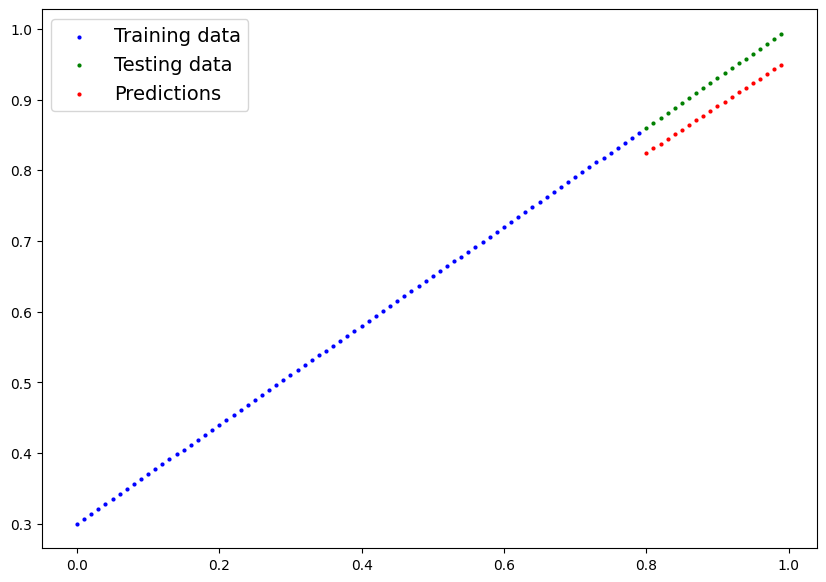

In [ ]:
model_2.eval()

with torch.inference_mode():
  y_preds=model_2(X_test_regression)



plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non_linearity

"What patterns could you draw if you were given an infinite amount of a straight and non_straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

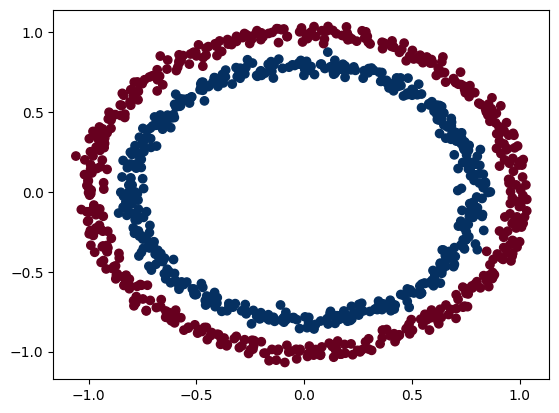

In [ ]:
#Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu);

In [ ]:
# convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity
* Linear
* Non-linear

Artificial neural networks are a large combination of linear(straight) and non-straight(non-linear) functions which are potentially able to find patterns in data

In [ ]:
# Build a model with non-linear activation functions

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=100)
    self.layer_2=nn.Linear(in_features=100, out_features=100)
    self.layer_3=nn.Linear(in_features=100, out_features=100)
    self.layer_4=nn.Linear(in_features=100, out_features=1)
    self.relu=nn.ReLU()

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))
model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=100, bias=True)
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=100, bias=True)
  (layer_4): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(model_3.parameters(), lr=0.01)

In [ ]:
# spam or not spam
# credit cards = fraud or not fraud
# insurance claims = at fault or not fault


### 6.3 Training a model with non-linearity



In [ ]:
# Random seeds
torch.manual_seed(42)

X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)

epochs=10000

for epoch in range(epochs):
  model_3.train()

  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits, y_train)
  acc=accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits, y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

    if epoch % 1000 == 0 :
      print(f"epoch:{epoch}, loss:{loss}, acc:{acc}, testloss:{test_loss}, test acc:{test_acc}%")

epoch:0, loss:0.6926445364952087, acc:55.125, testloss:0.6933353543281555, test acc:50.0%
epoch:1000, loss:0.6845391988754272, acc:58.5, testloss:0.6881006956100464, test acc:55.50000000000001%
epoch:2000, loss:0.6681127548217773, acc:62.74999999999999, testloss:0.6751129031181335, test acc:57.49999999999999%
epoch:3000, loss:0.5969261527061462, acc:96.75, testloss:0.6109606623649597, test acc:91.5%
epoch:4000, loss:0.24020729959011078, acc:99.875, testloss:0.27582383155822754, test acc:100.0%
epoch:5000, loss:0.050943125039339066, acc:100.0, testloss:0.07674989849328995, test acc:100.0%
epoch:6000, loss:0.021905116736888885, acc:100.0, testloss:0.04038017988204956, test acc:100.0%
epoch:7000, loss:0.013075399212539196, acc:100.0, testloss:0.027785882353782654, test acc:100.0%
epoch:8000, loss:0.009100876748561859, acc:100.0, testloss:0.021626541391015053, test acc:100.0%
epoch:9000, loss:0.006892729084938765, acc:100.0, testloss:0.018010703846812248, test acc:100.0%


In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

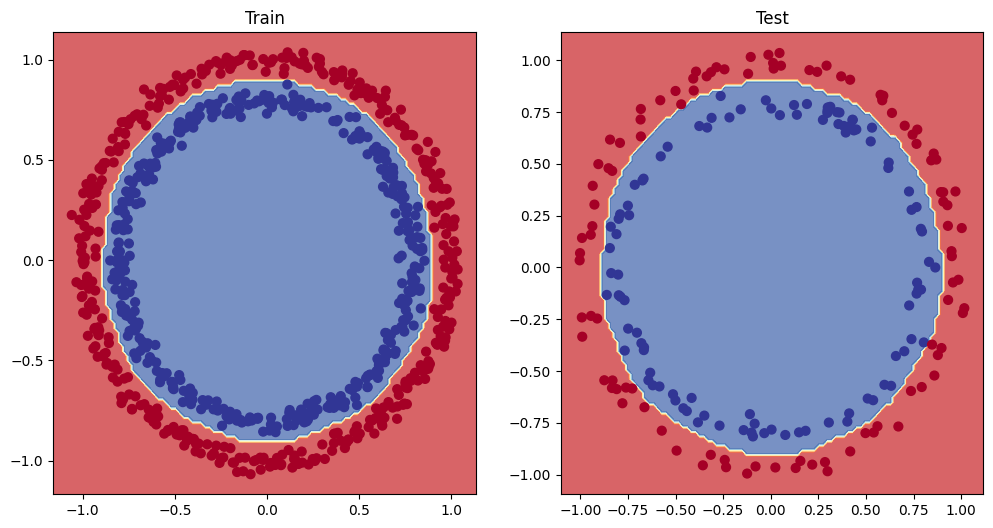

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover pattersns in data and it tries to figure out the patterns on its own

And these tools are linear$non-linear functions

In [ ]:
# Create a tensor
A=torch.arange(-10, 10 , 1, dtype= torch.float32)


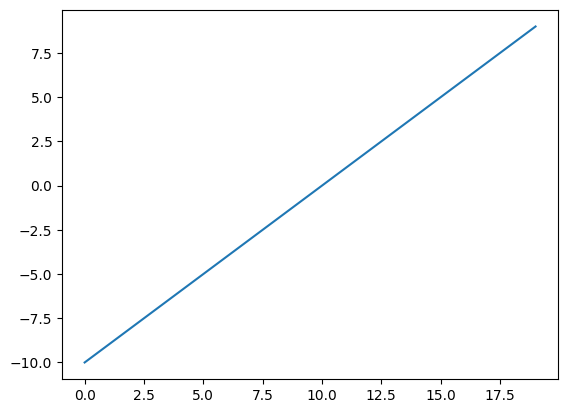

In [ ]:
#Visualize
plt.plot(A)

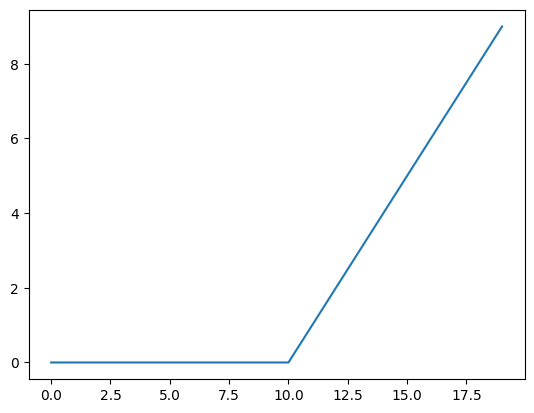

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)



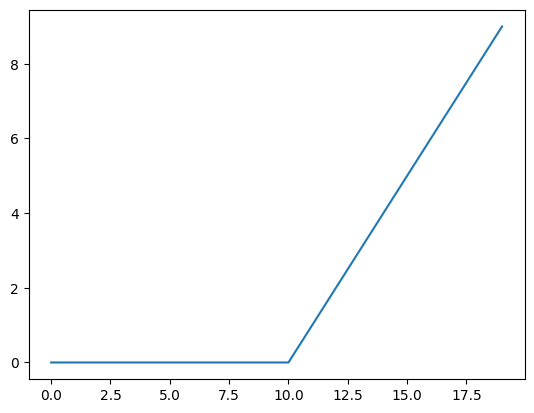

In [ ]:
plt.plot(relu(A))

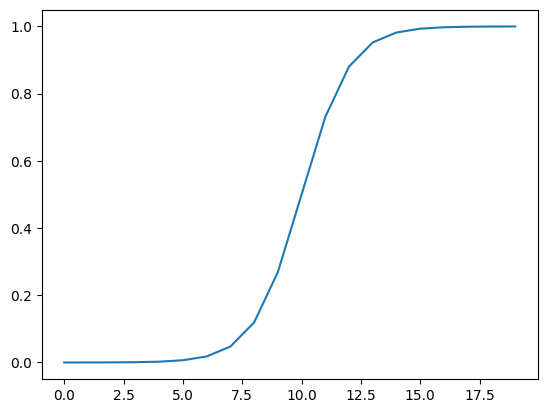

In [ ]:
plt.plot(torch.sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs dog, spam vs not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another


### 8.1 Creating a toy multi-class dataset

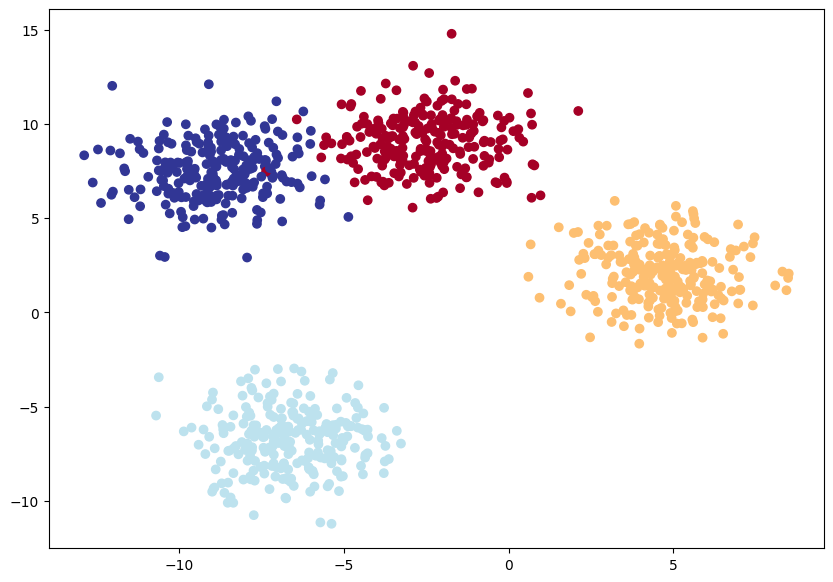

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

#1. Create multi-class data
x_blob, y_blob=make_blobs(n_samples=1000, n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,
                          random_state=RANDOM_SEED)
#2. Turn data into tensors
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test
x_blob_train, x_blob_test, y_blob_train, y_blob_test=train_test_split(x_blob,
                                                                      y_blob,
                                                                      test_size=0.2,
                                                                      random_state=RANDOM_SEED)
# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0], x_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Building a multi-class classification model in Pytorch


In [ ]:
# Create device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """initializes muylti class classification model.
    Args:
      input_features (int): number of input features to the model
      output_features_(int): Number of outputs features (number of output classes)
      hidden_units(int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super(). __init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of Blobmodel and send it to the target device
model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi class classification
loss_fn=nn.CrossEntropyLoss()


optimizer=torch.optim.SGD(params=model_4.parameters(), lr=0.1)


### 8.4 Getting prediction probabilities for a multi class Pytorch model

In order to evaluate and train and test our model, we need to convert our model's outputs to prediction probablities and then to prediction labels

Logits -> probabilities(use `torch.softmax` -> prediction labels



In [ ]:
model_4.eval()


with torch.inference_mode():
  y_logits=model_4(x_blob_test.to(device))

y_logits[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')

In [ ]:

y_pred_probs=torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')

In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.3244, device='cuda:0')

### 8.5 Creating a training loop and testing loop for a multi-class pytorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)

# Set number of epochs
epochs = 100

#Put data to the target device
x_blob_train, y_blob_train=x_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test=x_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ## Training
  model_4.train()

  y_logits=model_4(x_blob_train)

  y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss=loss_fn(y_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(x_blob_test)
    test_preds=torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits, y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

    #print out what's happening

    if epoch % 10 ==0:
      print(f"epoch: {epoch} | Loss: {loss} | ACC: {acc} | Testloss: {test_loss} | test acc: {test_acc}%")

epoch: 0 | Loss: 1.1588265895843506 | ACC: 40.375 | Testloss: 1.0755419731140137 | test acc: 48.0%
epoch: 10 | Loss: 0.6447554230690002 | ACC: 96.75 | Testloss: 0.6606872081756592 | test acc: 97.5%
epoch: 20 | Loss: 0.42535150051116943 | ACC: 98.5 | Testloss: 0.43074119091033936 | test acc: 100.0%
epoch: 30 | Loss: 0.2529423236846924 | ACC: 99.125 | Testloss: 0.24507619440555573 | test acc: 99.5%
epoch: 40 | Loss: 0.11232151091098785 | ACC: 99.25 | Testloss: 0.10228516906499863 | test acc: 99.5%
epoch: 50 | Loss: 0.06626511365175247 | ACC: 99.25 | Testloss: 0.058475375175476074 | test acc: 99.5%
epoch: 60 | Loss: 0.05068015679717064 | ACC: 99.25 | Testloss: 0.042932283133268356 | test acc: 99.5%
epoch: 70 | Loss: 0.042996764183044434 | ACC: 99.25 | Testloss: 0.03490966185927391 | test acc: 99.5%
epoch: 80 | Loss: 0.038361385464668274 | ACC: 99.25 | Testloss: 0.029878225177526474 | test acc: 99.5%
epoch: 90 | Loss: 0.03524843230843544 | ACC: 99.25 | Testloss: 0.026626527309417725 | test

### 8.6 Making and evaluating predictions with a Pytorch Multi-class model


In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logtis=model_4(x_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-1.3307,  6.3088, -6.8809, -7.8282],
        [ 3.4018, -4.6805, -7.1367, -3.3361],
        [-4.3028, -4.9199,  3.7618, -3.3281],
        [-2.7538, -3.2594,  2.7930, -2.2365],
        [ 1.7691, -4.4828, -4.9421, -1.3229],
        [ 2.7241,  0.4364, -7.4821, -6.6485],
        [ 2.5642, -5.9972, -7.0990, -1.9725],
        [-0.9663,  4.8096, -5.1917, -6.1293],
        [-2.3180, -5.7948, -2.6578,  2.6897],
        [ 2.1851, -5.1785, -5.9720, -1.6769]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
y_pred_probs=torch.softmax(y_logits, dim=1)
print(y_pred_probs[:10])


tensor([[4.8084e-04, 9.9952e-01, 1.8689e-06, 7.2470e-07],
        [9.9848e-01, 3.0848e-04, 2.6456e-05, 1.1834e-03],
        [3.1407e-04, 1.6944e-04, 9.9868e-01, 8.3240e-04],
        [3.8505e-03, 2.3225e-03, 9.8737e-01, 6.4598e-03],
        [9.5369e-01, 1.8376e-03, 1.1609e-03, 4.3311e-02],
        [9.0775e-01, 9.2143e-02, 3.3534e-05, 7.7185e-05],
        [9.8916e-01, 1.8928e-04, 6.2893e-05, 1.0593e-02],
        [3.0918e-03, 9.9685e-01, 4.5199e-05, 1.7698e-05],
        [6.6093e-03, 2.0427e-04, 4.7053e-03, 9.8848e-01],
        [9.7852e-01, 6.2034e-04, 2.8055e-04, 2.0575e-02]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [ ]:
y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

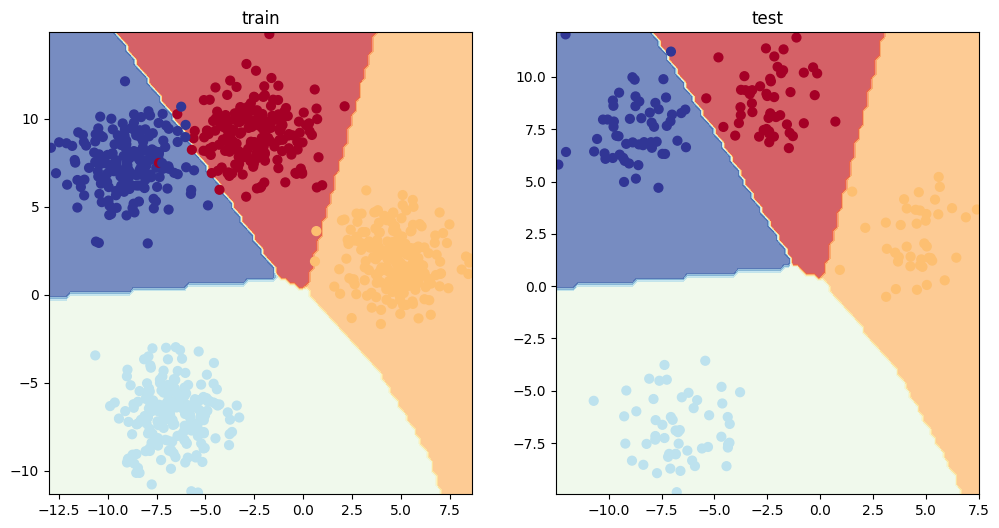

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4, x_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, x_blob_test, y_blob_test)

## 9. A few more classification metrics...(to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1 Score
* Confusion matrix
* Classification report

